In [29]:
import os
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
from silq.tools import fit_toolbox
qc.data.data_set.DataSet.default_io.base_location = 'E:\EWJN\data'
loc_provider = qc.data.location.FormatLocation(fmt='{date}/#{counter}_{name}_{time}')
qc.data.data_set.DataSet.location_provider=loc_provider
%matplotlib notebook

<IPython.core.display.Javascript object>


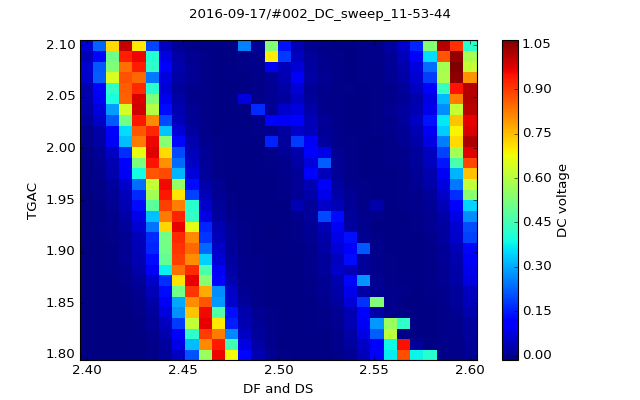

In [6]:
data = qc.load_data('2016-09-17/#002_DC_sweep_11-53-44')
plot = qc.MatPlot(data.DC_voltage)

Will choose left coulomb peak. Taking another scan at top left

<IPython.core.display.Javascript object>


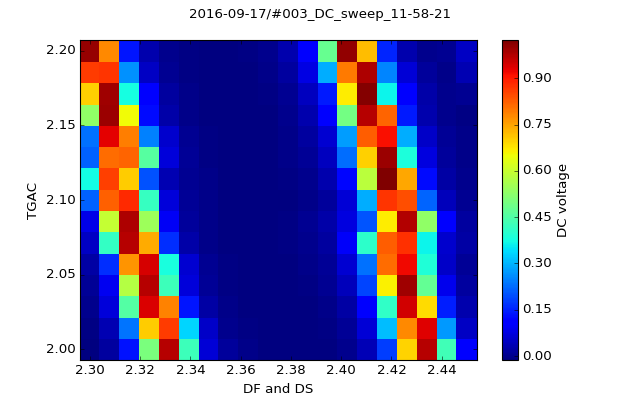

In [10]:
data = qc.load_data('2016-09-17/#003_DC_sweep_11-58-21')
plot = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


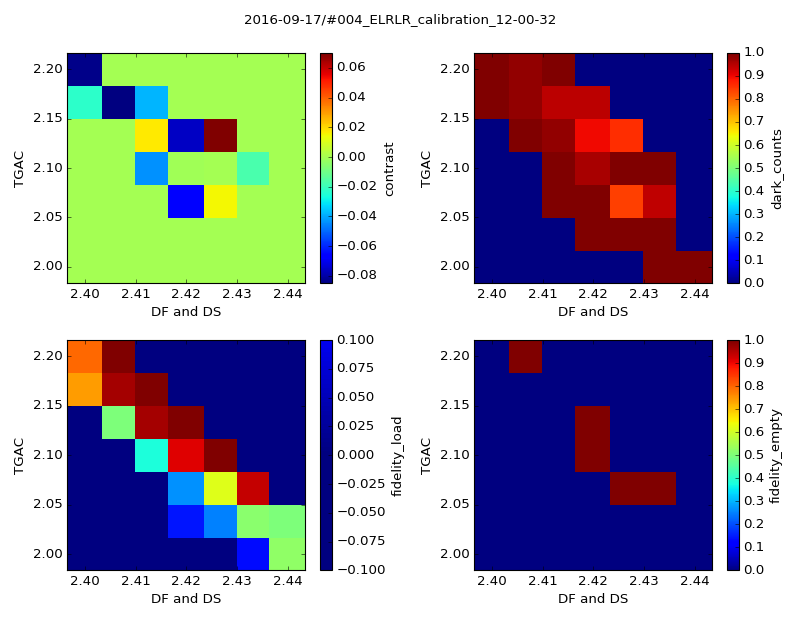

In [17]:
data = qc.load_data('2016-09-17/#004_ELRLR_calibration_12-00-32')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


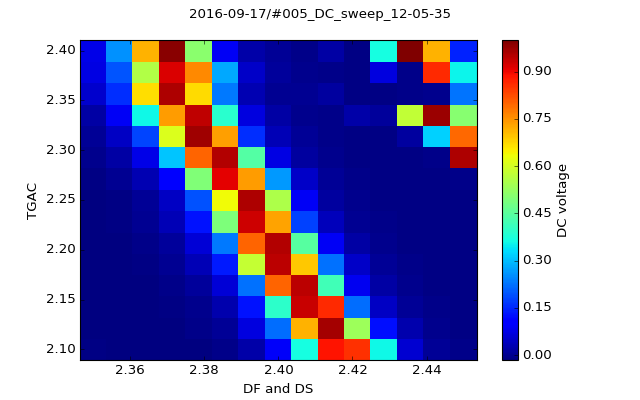

In [18]:
data = qc.load_data('2016-09-17/#005_DC_sweep_12-05-35')
plot = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


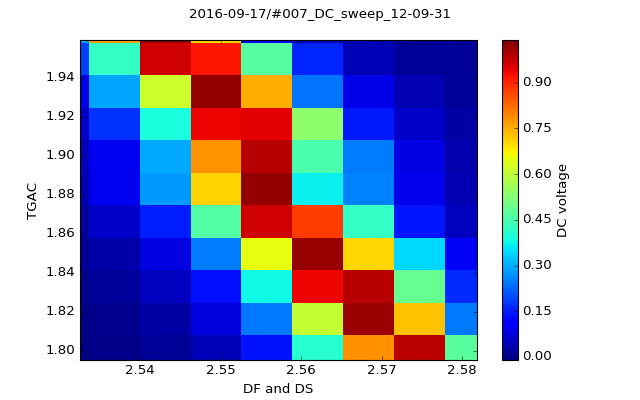

In [21]:
data = qc.load_data('2016-09-17/#007_DC_sweep_12-09-31')
plot = qc.MatPlot(data.DC_voltage)

The peak clearly shifted. Now I'm choosing the peak to the left instead

<IPython.core.display.Javascript object>


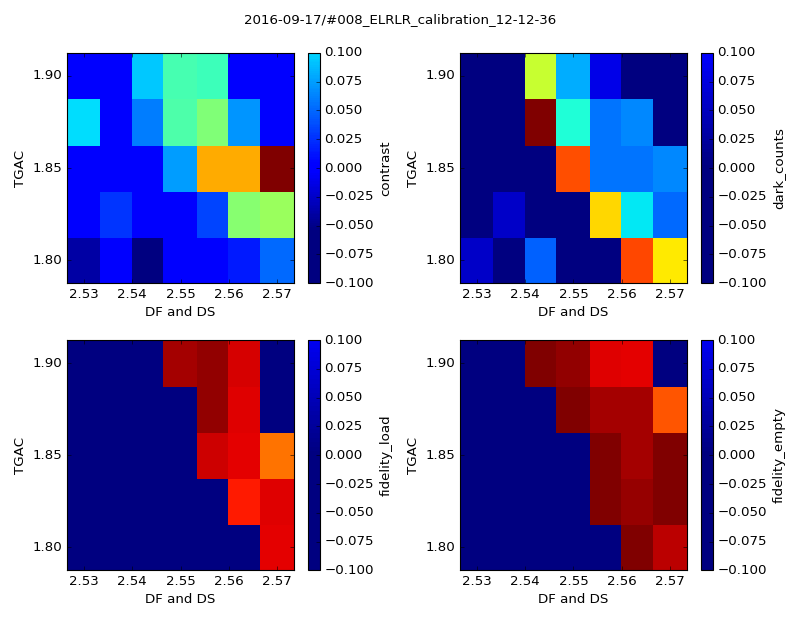

In [23]:
data = qc.load_data('2016-09-17/#008_ELRLR_calibration_12-12-36')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


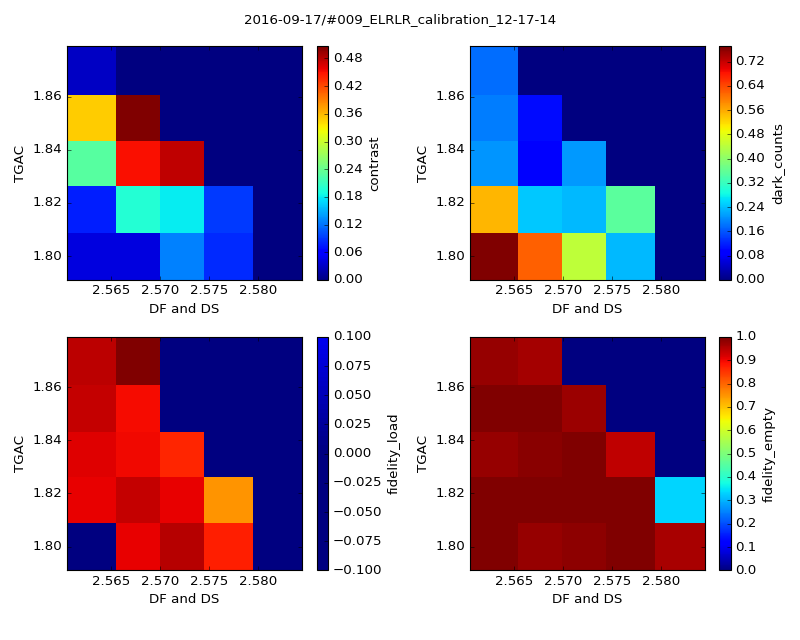

In [24]:
data = qc.load_data('2016-09-17/#009_ELRLR_calibration_12-17-14')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


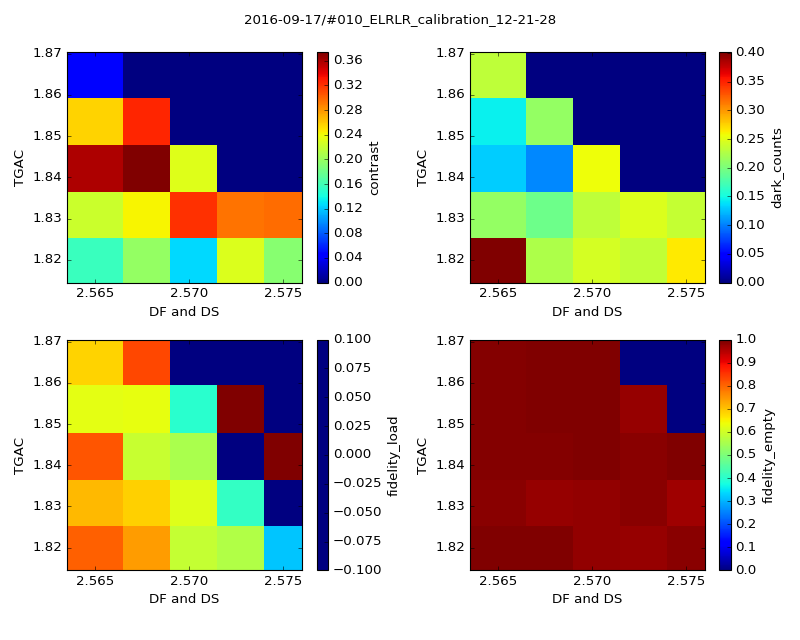

In [25]:
data = qc.load_data('2016-09-17/#010_ELRLR_calibration_12-21-28')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


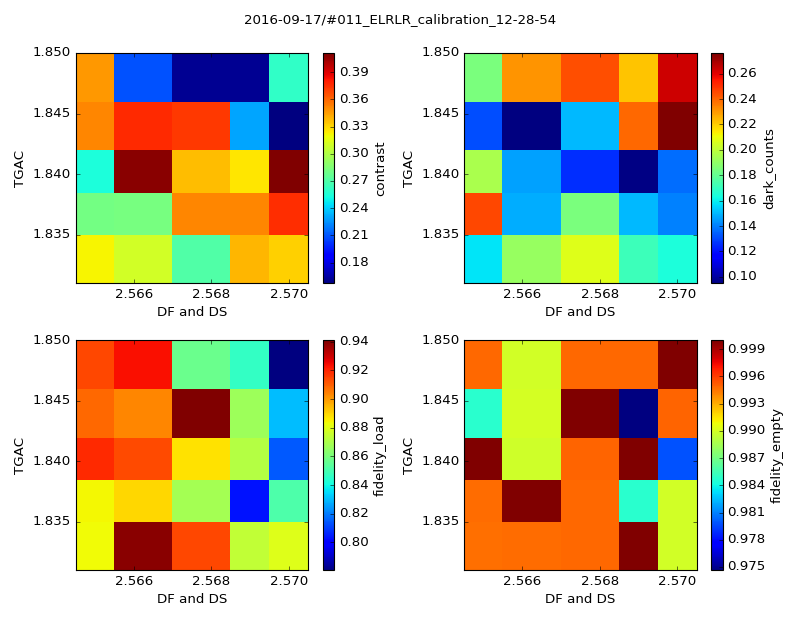

In [27]:
data = qc.load_data('2016-09-17/#011_ELRLR_calibration_12-28-54')

plot = qc.MatPlot(subplots=(2,2), figsize=(10,8))
plot.add(data.contrast, subplot=1, nticks=6)
plot.add(data.dark_counts, subplot=2, nticks=6)
plot.add(data.fidelity_load, subplot=3, nticks=6)
plot.add(data.fidelity_empty, subplot=4, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Operating point:

TGAC(1.840)
DF_DS(2.566)

fidelity_empty: 0.982
fidelity_load: 0.908
fidelity_read: 0.728
up_proportion: 0.470
dark_counts: 0.133
contrast: 0.337

Number of successful sweeps: 15


<IPython.core.display.Javascript object>


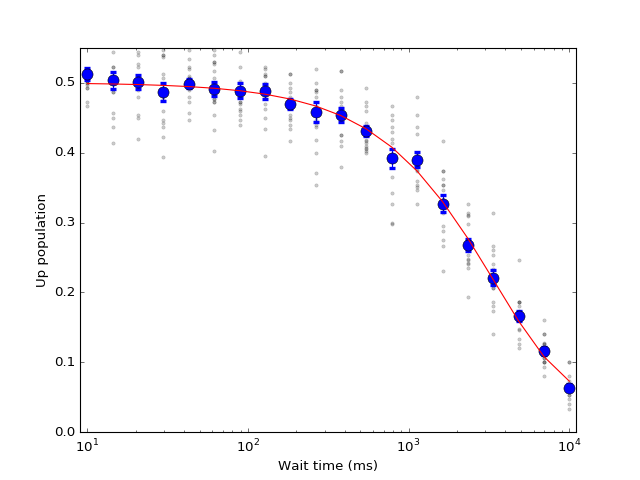

T1 time: 3435 ms
[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 23
    # data points      = 20
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -186.712
    Bayesian info crit = -183.724
[[Variables]]
    amplitude:   0.45222765 +/- 0.010515 (2.33%) (init= 0.5035377)
    tau:         3435.47825 +/- 191.4343 (5.57%) (init= 4818.546)
    offset:      0.04813642 +/- 0.010907 (22.66%) (init= 0.06355555)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.966 
    C(tau, offset)               = -0.881 
    C(amplitude, tau)            =  0.795 



In [30]:
data = qc.load_data('2016-09-17/#012_T1_data_12-42-07')
T1_wait_times = data.T1_wait_time_set[0]
T1_wait_times_sorted = np.sort(T1_wait_times)
idx_sorted = np.argsort(T1_wait_times)

max_idx = np.argmin([~np.isnan(np.sum(datarow)) for datarow in data.up_proportion_3_0_0])
print('Number of successful sweeps: {}'.format(max_idx))
vals = data.up_proportion_3_0_0[:max_idx]
vals_sorted = vals[:,idx_sorted]
vals_mean_sorted = np.mean(vals_sorted,axis=0)
vals_std_sorted = np.std(vals_sorted,axis=0)
vals_std_mean_sorted = vals_std_sorted/np.sqrt(max_idx)


fig = plt.figure()
ax = fig.gca()
for datarow in vals_sorted:
    ax.plot(T1_wait_times_sorted, datarow, 'ok', ms=3, alpha=0.2)
(_, caps, _) = ax.errorbar(T1_wait_times_sorted, vals_mean_sorted, yerr=vals_std_mean_sorted, 
                           marker='o', linestyle='',ms=10)
for cap in caps:
    cap.set_markeredgewidth(3)
    
# Fitting 
mod = fit_toolbox.ExponentialFit()
result=mod.perform_fit(T1_wait_times_sorted,vals_mean_sorted)#, weights=1/np.power(vals_std_mean_sorted,2))
print('T1 time: {:.0f} ms'.format(result.best_values['tau']))
plt.plot(T1_wait_times_sorted, result.best_fit, 'r-')

ax.set_xscale("log")
ax.set_xlim([0.9*T1_wait_times_sorted[0], 1.1*T1_wait_times_sorted[-1]])
ax.set_ylim([0, 0.55])

ax.set_xlabel('Wait time (ms)')
ax.set_ylabel('Up population')
print(result.fit_report())